# Import Libraries

In [483]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, classification_report, f1_score, precision_score, recall_score
import xgboost as xgb
from sklearn.model_selection import train_test_split
import numpy as np



# EDA

In [484]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)
pd.set_option('display.width', None)

In [485]:
data = pd.read_csv("startup_data.csv")

In [486]:
data.tail(10)

,state_code,latitude,longitude,zip_code,id,city,name,founded_at,closed_at,first_funding_at,last_funding_at,age_first_funding_year,age_last_funding_year,age_first_milestone_year,age_last_milestone_year,relationships,funding_rounds,funding_total_usd,milestones,state_code.1,is_CA,is_NY,is_MA,is_TX,is_otherstate,category_code,is_software,is_web,is_mobile,is_enterprise,is_advertising,is_gamesvideo,is_ecommerce,is_biotech,is_consulting,is_othercategory,object_id,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500,status
913,TX,29.739322,-95.444747,77027,c:15509,Houston,Rudder,10/1/2006,11/5/2010,1/15/2008,1/15/2008,1.2904,1.2904,7.1233,7.1233,3,1,2000000,1,TX,0,0,0,1,0,web,0,1,0,0,0,0,0,0,0,0,c:15509,0,0,1,0,0,0,1.0000,0,closed
914,NY,40.750519,-73.993494,10001,c:52378,New York,Panvidea,1/1/2007,NaN,3/19/2010,3/19/2010,3.2137,3.2137,3.0027,4.6219,5,1,2700000,2,NY,0,1,0,0,0,games_video,0,0,0,0,0,1,0,0,0,0,c:52378,0,0,1,0,0,0,2.0000,1,acquired
915,WI,43.090756,-89.522805,53562,c:167,Middleton,Sway,12/3/2004,12/2/2012,1/19/2010,1/19/2010,5.1315,5.1315,3.1616,8.5123,6,1,2000000,2,WI,0,0,0,0,1,advertising,0,0,0,0,1,0,0,0,0,0,c:167,0,0,1,0,0,0,2.0000,0,closed
916,NY,40.742953,-73.984461,10018,c:17758,New York,TRAFFIQ,9/6/2006,NaN,9/6/2006,8/10/2010,0.0000,3.9288,2.9151,5.7342,16,3,18000000,3,NY,0,1,0,0,0,advertising,0,0,0,0,1,0,0,0,0,0,c:17758,1,0,1,1,0,0,2.3333,1,acquired
917,WA,47.802184,-122.196307,98021,c:8339,Bothell,Dexterra,1/1/2000,NaN,8/17/2005,10/2/2008,5.6301,8.7589,8.5041,8.7589,9,5,122500000,2,WA,0,0,0,0,1,mobile,0,0,1,0,0,0,0,0,0,0,c:8339,1,0,0,0,1,1,5.6000,1,acquired
918,CA,37.740594,-122.376471,94107,c:21343,San Francisco,CoTweet,1/1/2009,NaN,7/9/2009,7/9/2009,0.5178,0.5178,0.5808,4.5260,9,1,1100000,2,CA,1,0,0,0,0,advertising,0,0,0,0,1,0,0,0,0,0,c:21343,0,0,1,0,0,0,6.0000,1,acquired
919,MA,42.504817,-71.195611,1803,c:41747,Burlington,Reef Point Systems,1/1/1998,6/25/2008,4/1/2005,3/23/2007,7.2521,9.2274,6.0027,6.0027,1,3,52000000,1,MA,0,0,1,0,0,security,0,0,0,0,0,0,0,0,0,1,c:41747,1,0,0,1,0,0,2.6667,1,closed
920,CA,37.408261,-122.015920,94089,c:31549,Sunnyvale,Paracor Medical,1/1/1999,6/17/2012,6/29/2007,6/29/2007,8.4959,8.4959,9.0055,9.0055,5,1,44000000,1,CA,1,0,0,0,0,biotech,0,0,0,0,0,0,0,1,0,0,c:31549,0,0,0,0,0,1,8.0000,1,closed
921,CA,37.556732,-122.288378,94404,c:33198,San Francisco,Causata,1/1/2009,NaN,10/5/2009,11/1/2011,0.7589,2.8329,0.7589,3.8356,12,2,15500000,2,CA,1,0,0,0,0,software,1,0,0,0,0,0,0,0,0,0,c:33198,0,0,1,1,0,0,1.0000,1,acquired
922,CA,37.386778,-121.966277,95054,c:26702,Santa Clara,Asempra Technologies,1/1/2003,NaN,2/13/2006,2/13/2006,3.1205,3.1205,4.0027,4.0027,4,1,20000000,1,CA,1,0,0,0,0,security,0,0,0,0,0,0,0,0,0,1,c:26702,0,0,0,1,0,0,3.0000,1,acquired


In [487]:
data.name.value_counts()

name
Redwood Systems         2
Bandsintown             1
xkoto                   1
Jobs2Web                1
HighlightCam            1
                       ..
Powerset                1
Kiptronic               1
Cozi Group              1
Likewise Software       1
Asempra Technologies    1
Name: count, Length: 922, dtype: int64

In [488]:
data[data['name'] == 'Redwood Systems']

,state_code,latitude,longitude,zip_code,id,city,name,founded_at,closed_at,first_funding_at,last_funding_at,age_first_funding_year,age_last_funding_year,age_first_milestone_year,age_last_milestone_year,relationships,funding_rounds,funding_total_usd,milestones,state_code.1,is_CA,is_NY,is_MA,is_TX,is_otherstate,category_code,is_software,is_web,is_mobile,is_enterprise,is_advertising,is_gamesvideo,is_ecommerce,is_biotech,is_consulting,is_othercategory,object_id,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500,status
124,CA,37.54827,-121.988572,94538,c:28482,Fremont,Redwood Systems,1/1/2008,NaN,10/3/2008,5/30/2012,0.7562,4.4137,2.7836,4.0027,14,4,34250000,2,CA,1,0,0,0,0,cleantech,0,0,0,0,0,0,0,0,0,1,c:28482,1,0,1,1,1,0,2.25,1,acquired
832,CA,37.48151,-121.945328,94538,c:28482,Fremont,Redwood Systems,1/1/2008,NaN,10/3/2008,5/30/2012,0.7562,4.4137,2.7836,4.0027,14,4,34250000,2,CA,1,0,0,0,0,cleantech,0,0,0,0,0,0,0,0,0,1,c:28482,1,0,1,1,1,0,2.25,1,acquired


In [489]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 923 entries, 0 to 922
Data columns (total 46 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   state_code                923 non-null    object 
 1   latitude                  923 non-null    float64
 2   longitude                 923 non-null    float64
 3   zip_code                  923 non-null    object 
 4   id                        923 non-null    object 
 5   city                      923 non-null    object 
 6   name                      923 non-null    object 
 7   founded_at                923 non-null    object 
 8   closed_at                 335 non-null    object 
 9   first_funding_at          923 non-null    object 
 10  last_funding_at           923 non-null    object 
 11  age_first_funding_year    923 non-null    float64
 12  age_last_funding_year     923 non-null    float64
 13  age_first_milestone_year  771 non-null    float64
 14  age_last_m

In [490]:
data.shape

(923, 46)

In [491]:
data.isna().sum()

state_code                    0
latitude                      0
longitude                     0
zip_code                      0
id                            0
city                          0
name                          0
founded_at                    0
closed_at                   588
first_funding_at              0
last_funding_at               0
age_first_funding_year        0
age_last_funding_year         0
age_first_milestone_year    152
age_last_milestone_year     152
relationships                 0
funding_rounds                0
funding_total_usd             0
milestones                    0
state_code.1                  1
is_CA                         0
is_NY                         0
is_MA                         0
is_TX                         0
is_otherstate                 0
category_code                 0
is_software                   0
is_web                        0
is_mobile                     0
is_enterprise                 0
is_advertising                0
is_games

age_first_milestone_year & age_last_milestone_year & closed_at are the only 3 features having missing values. There are 923 rows and 46 columns/features
converting all datetime colums like 'founded_at', 'closed_at', 'first_funding_at', 'last_funding_at' to datetime data type.

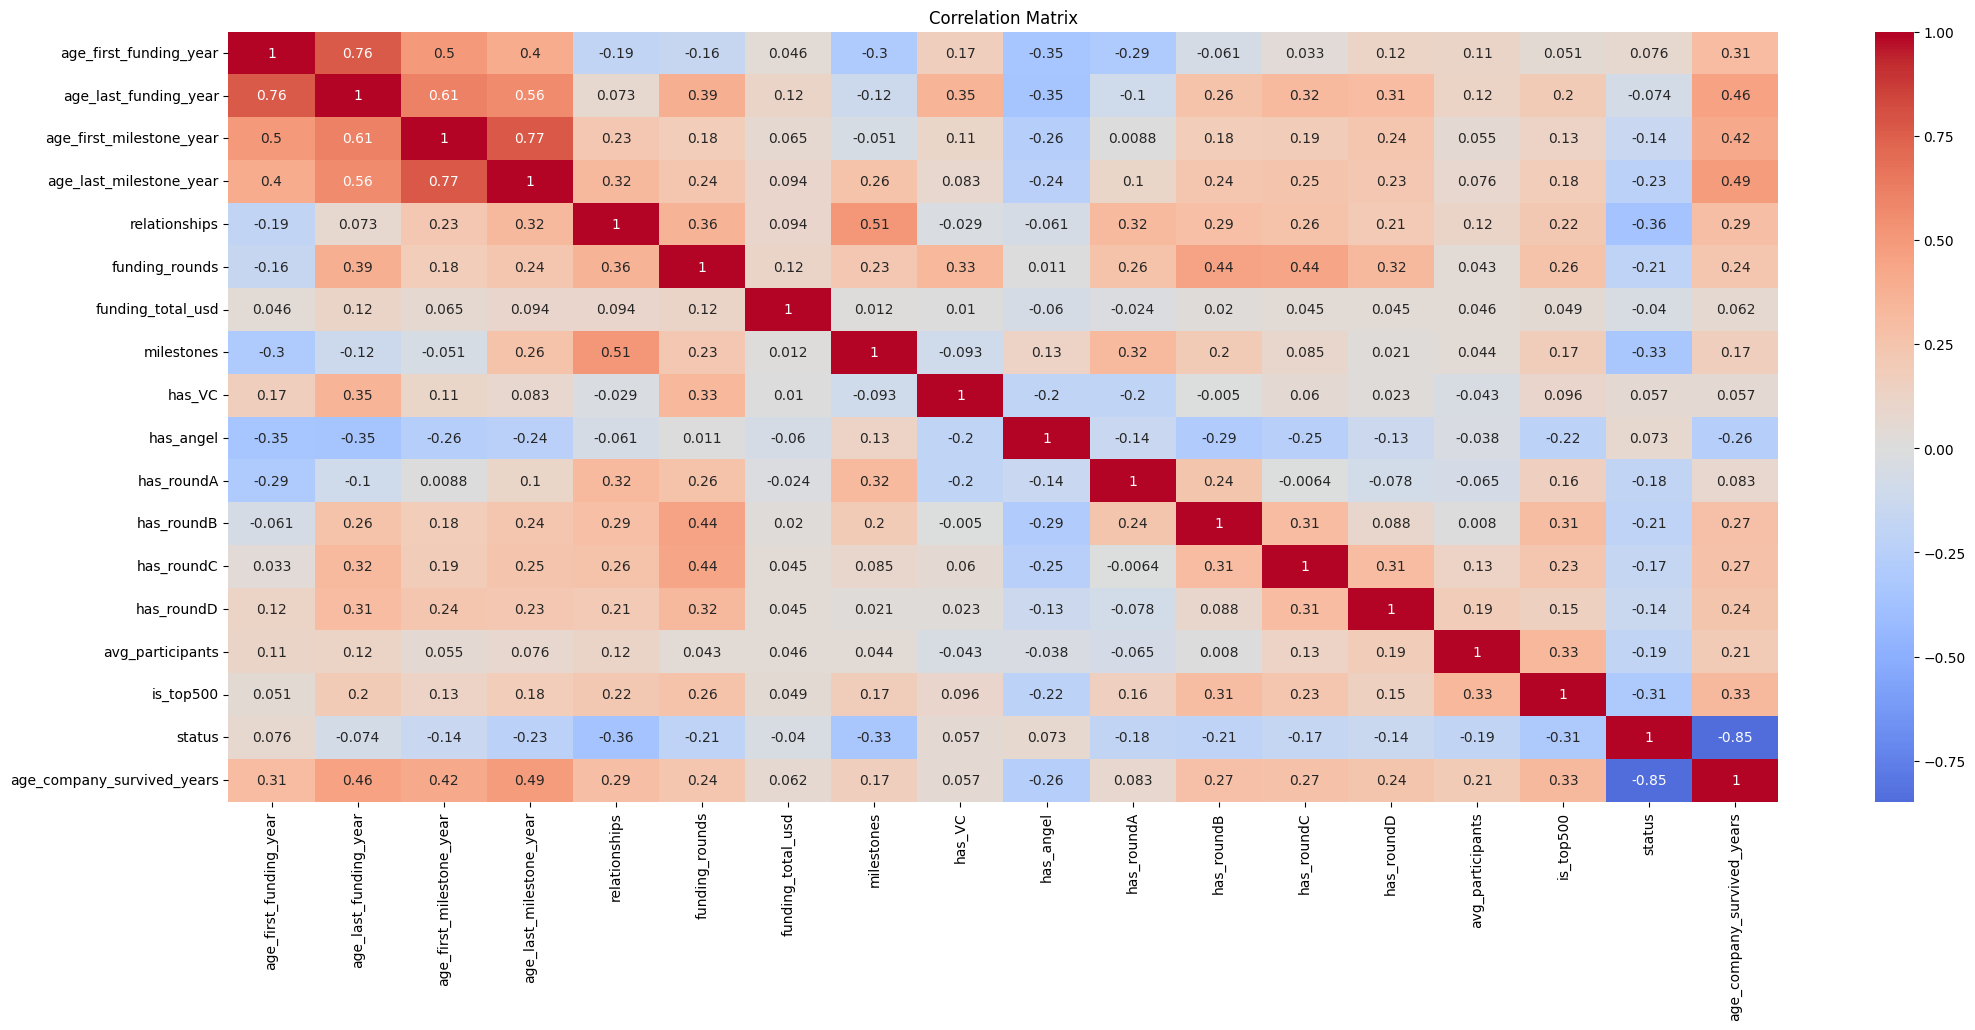

In [492]:
# Heatmap to see correlation between variables

plt.figure(figsize=(25, 10))
sns.heatmap(df.corr(numeric_only=True), annot = True, cmap="coolwarm", center=0)
plt.title('Correlation Matrix')
plt.show()


In [493]:
data.columns

Index(['state_code', 'latitude', 'longitude', 'zip_code', 'id', 'city', 'name',
       'founded_at', 'closed_at', 'first_funding_at', 'last_funding_at',
       'age_first_funding_year', 'age_last_funding_year',
       'age_first_milestone_year', 'age_last_milestone_year', 'relationships',
       'funding_rounds', 'funding_total_usd', 'milestones', 'state_code.1',
       'is_CA', 'is_NY', 'is_MA', 'is_TX', 'is_otherstate', 'category_code',
       'is_software', 'is_web', 'is_mobile', 'is_enterprise', 'is_advertising',
       'is_gamesvideo', 'is_ecommerce', 'is_biotech', 'is_consulting',
       'is_othercategory', 'object_id', 'has_VC', 'has_angel', 'has_roundA',
       'has_roundB', 'has_roundC', 'has_roundD', 'avg_participants',
       'is_top500', 'status'],
      dtype='object')

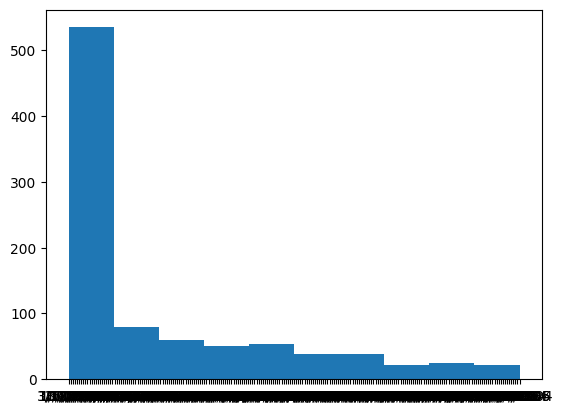

In [494]:
plt.hist(data['founded_at'])
plt.show()

The most companies were founded roughly between 2004-2008. This could be due to various factors such as economic conditions, technological advancements, or favorable business environments. Investors may have been more willing to support startups, leading to a boom in new business formations during that time.

In [495]:
# func for bar plot
def pltbar(col1, col2, figuresize, title, xlabel, ylabel):
    x_axis = col1

    y_axis = col2
    
    # Plotting the histogram
    plt.figure(figsize = figuresize)  # Adjusted figure size
    bars = plt.bar(x_axis, y_axis, color='purple')
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    
    
    plt.show()

In [496]:
# func for scatterplot

def plot(x,y,data):
    plt.figure(figsize=(10,10))
    plt.scatter(x,y,data=data)
    plt.xlabel(x)
    plt.ylabel(y)
    print('Scatterpot between',x,'and',y)
    plt.show()

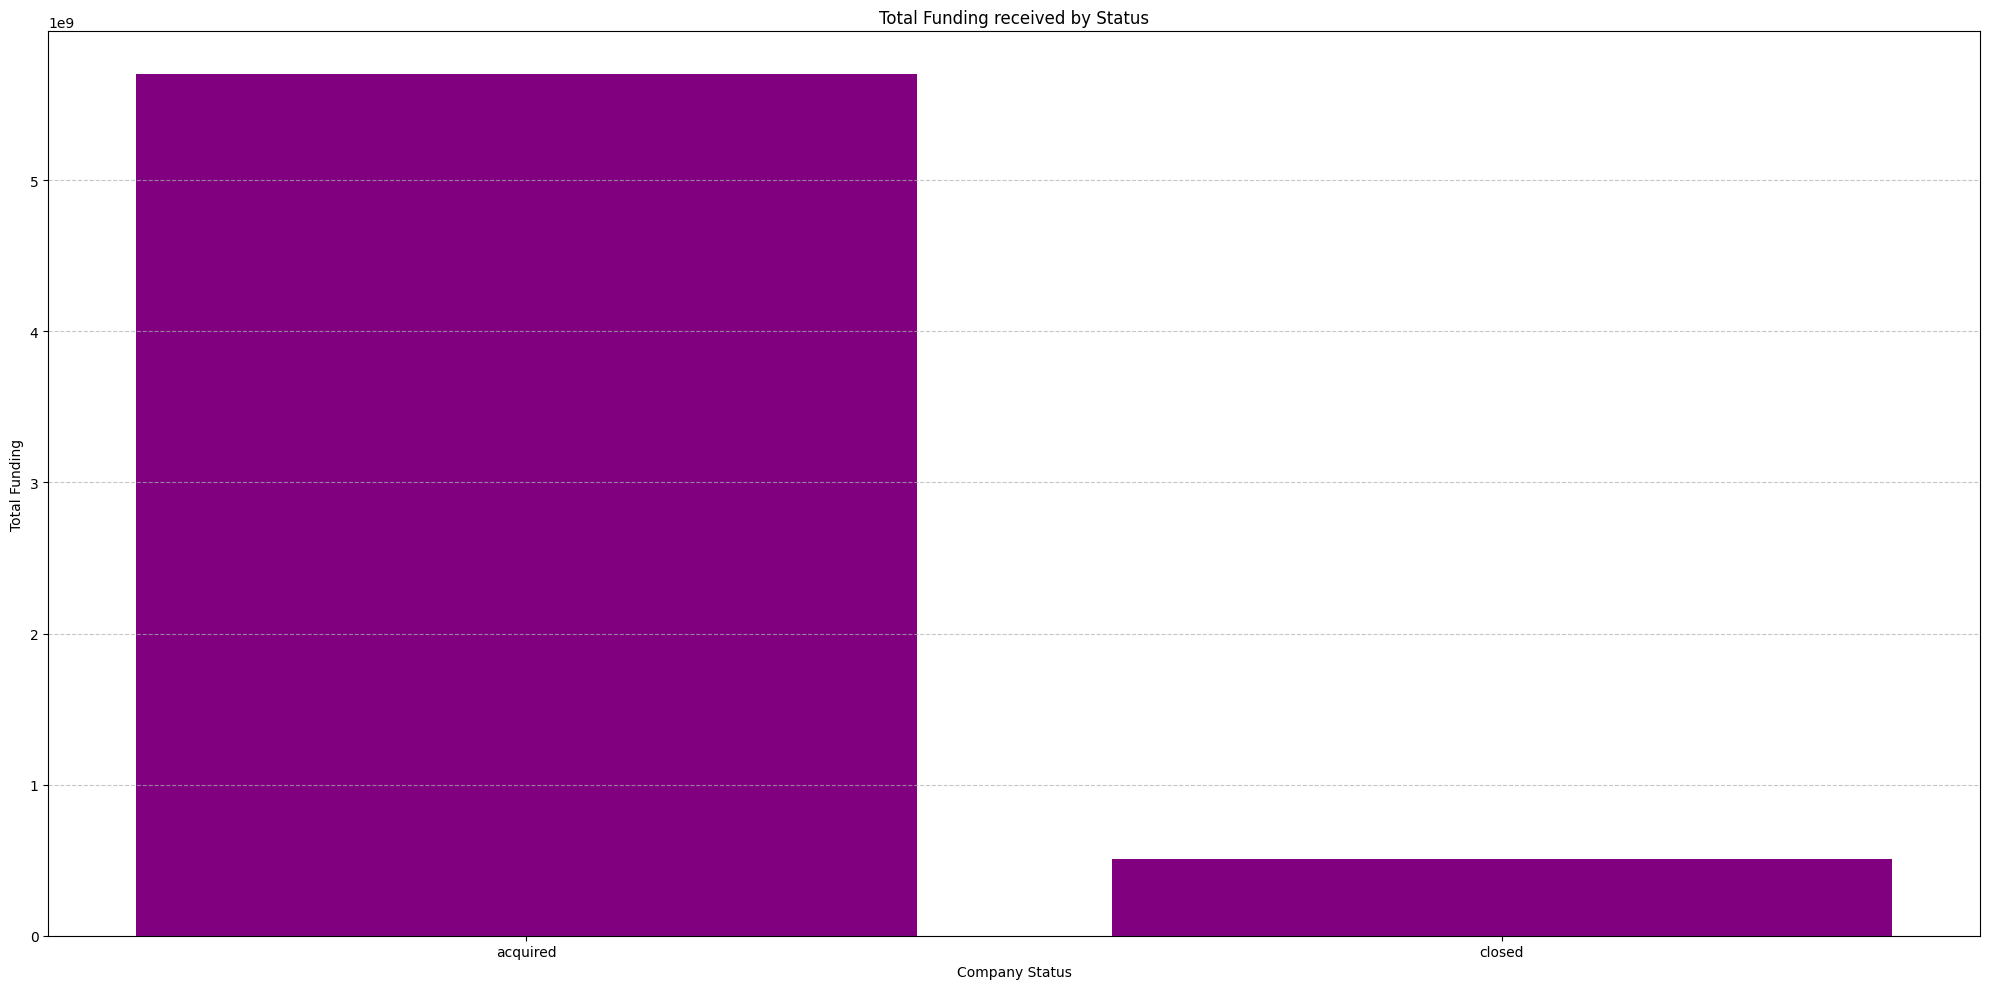

In [497]:

pltbar( data['status'], data['funding_total_usd'], (20,10), 'Total Funding received by Status', 'Company Status', 'Total Funding')

Naturally the comapnies that received the most funding were acquired.

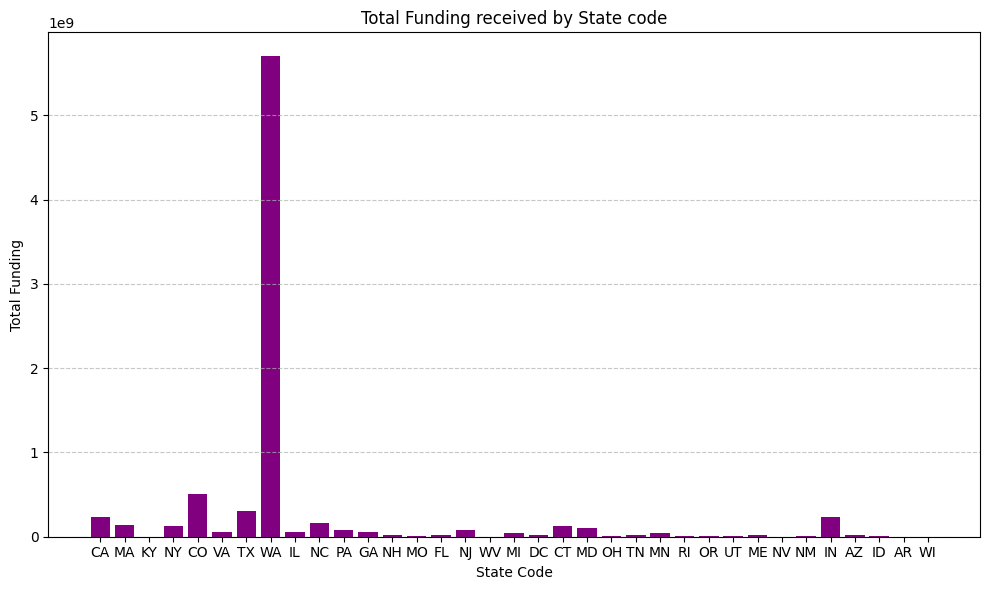

In [498]:

pltbar( data['state_code'], data['funding_total_usd'], (10,6), 'Total Funding received by State code', 'State Code', 'Total Funding')

The companies that receive the most funding are from washington state indicates the presence of businesses that are valued highly by investors.

Scatterpot between funding_total_usd and category_code


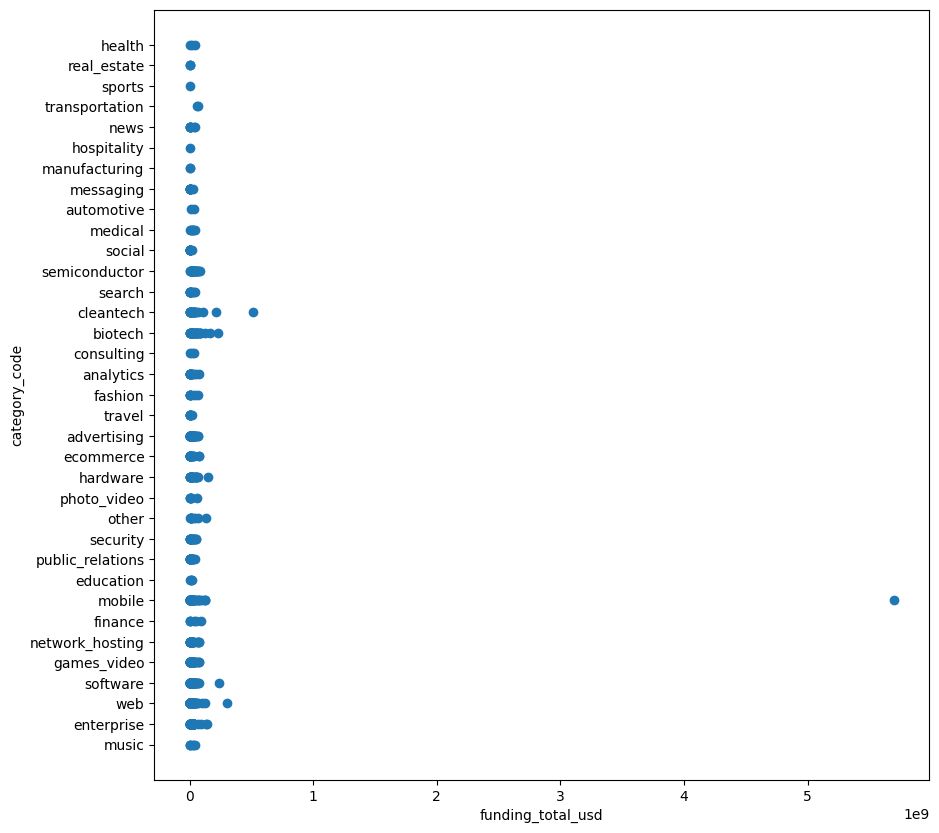

In [499]:

plot(x='funding_total_usd',y='category_code',data=data)


The mobile category is having the largest funding followed by cleantech. Sports, hospitality, manufacturing are having the smallest funding. This can help startups understand which industries are currently doing well before they build their business.

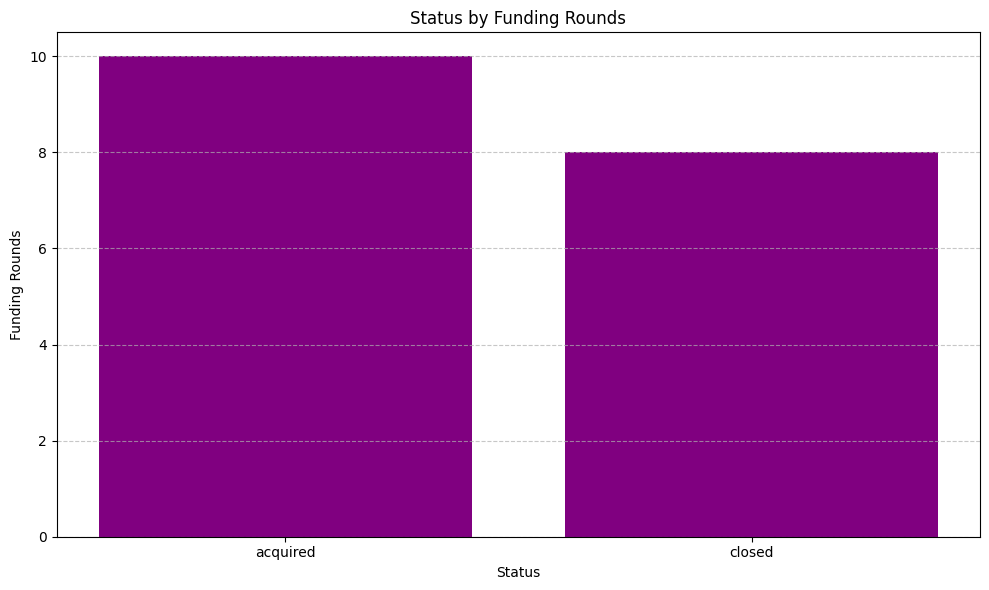

In [500]:

pltbar( data['status'], data['funding_rounds'], (10,6), 'Status by Funding Rounds', 'Status', 'Funding Rounds')

From the acquired companies, some companies had upto 10 funding rounds suggesting that these companies were able to attract repeated investments from venture capitalists, angel investors, or other sources throughout their operational lifecycle.Some of the companies that closed had upto 8 funding rounds indicating that even companies that received multiple rounds of funding may not necessarily sustain operations indefinitely, and factors such as market conditions, business model viability, or management issues may contribute to closure.

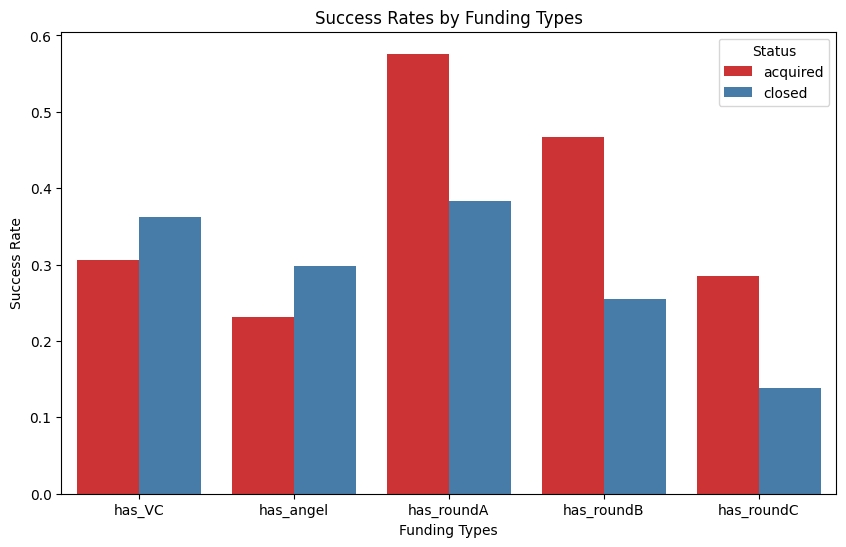

In [501]:
# Calculate success rates for different funding types
success_rates = data.groupby('status')[['has_VC', 'has_angel', 'has_roundA', 'has_roundB', 'has_roundC']].mean().reset_index()

# Melt the dataframe for easier plotting
success_rates_melted = success_rates.melt(id_vars='status', var_name='funding_type', value_name='success_rate')

# Set up the figure with appropriate size
plt.figure(figsize=(10, 6))

# Bar plot for success rates of different funding types
sns.barplot(x='funding_type', y='success_rate', hue='status', data=success_rates_melted, palette='Set1')
plt.title('Success Rates by Funding Types')
plt.xlabel('Funding Types')
plt.ylabel('Success Rate')
plt.legend(title='Status', loc='upper right')

# Show the plot
plt.show()

<Axes: xlabel='category_code', ylabel='Count'>

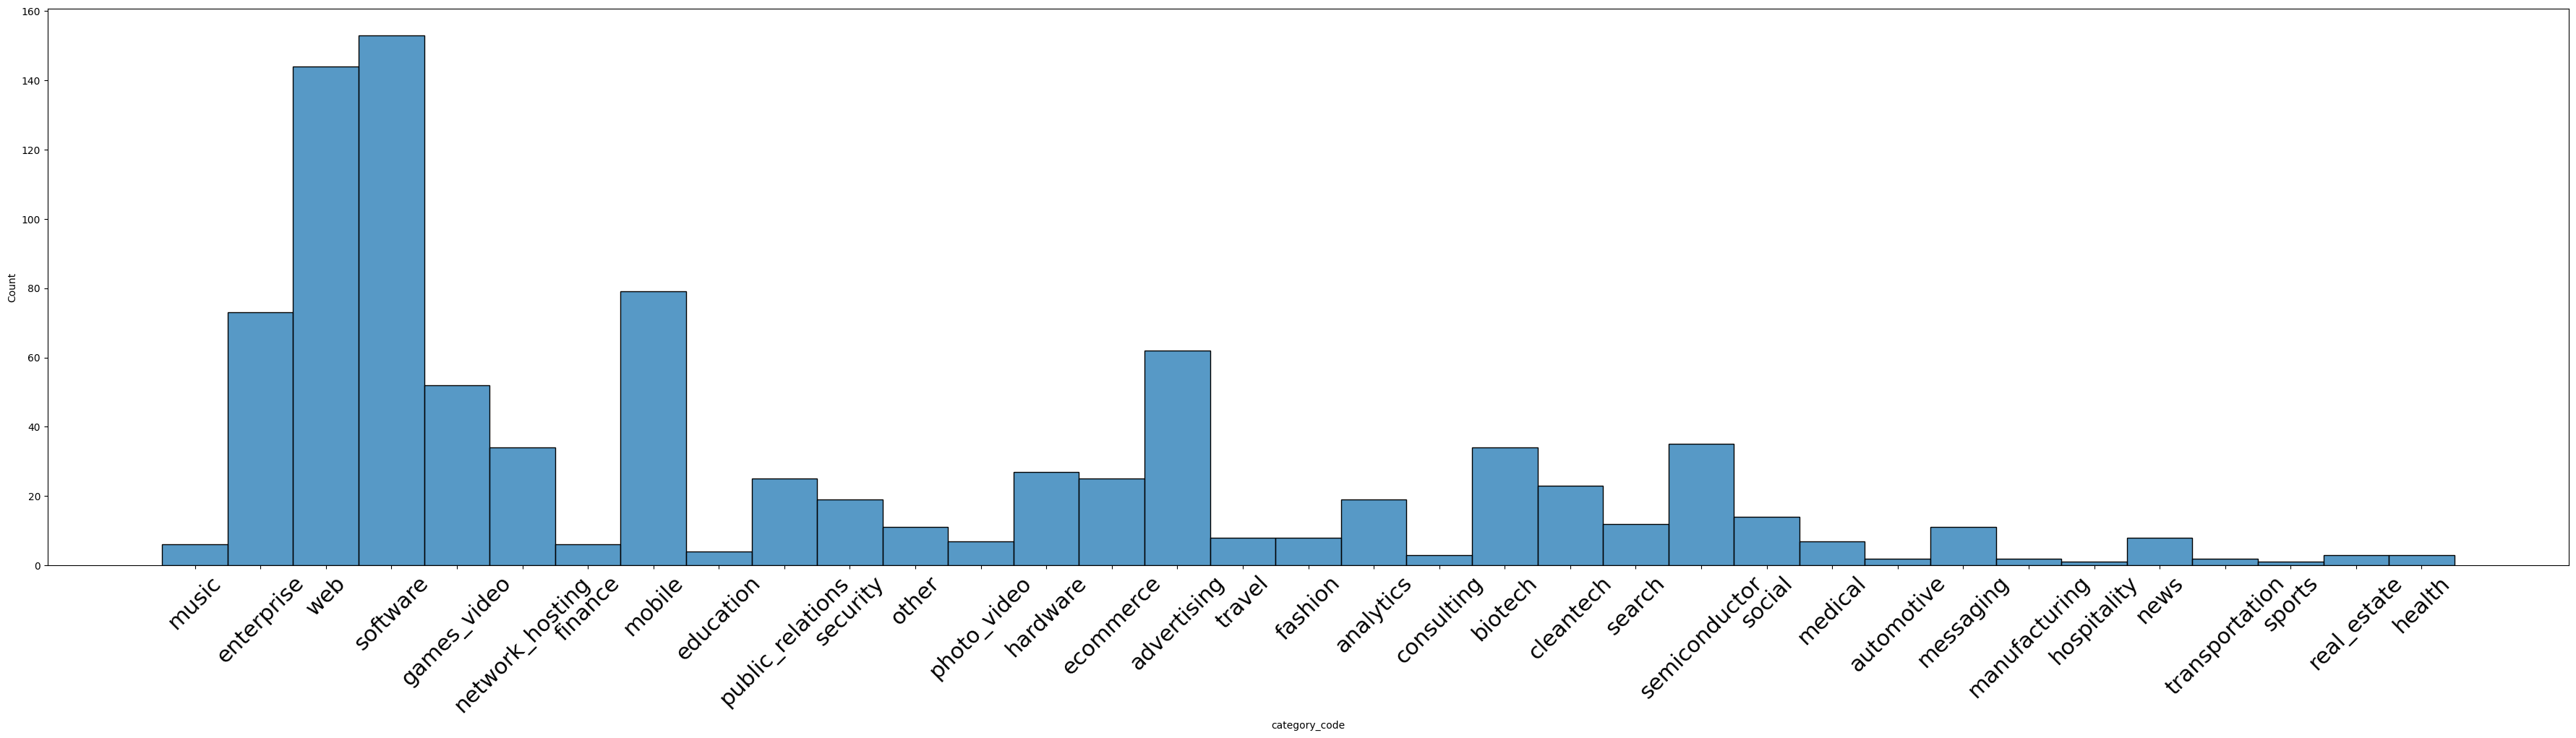

In [502]:
plt.figure(figsize= (45,10))
plt.xticks(rotation=45, fontsize=22)

sns.histplot(data.category_code)


#### Top 10 category in category_code are:

###### Software
###### Web
###### Mobile
###### Enterprise
###### Advertising
###### Games_video
###### Network_hosting
###### Biotech
###### Semiconductor
###### Hardware

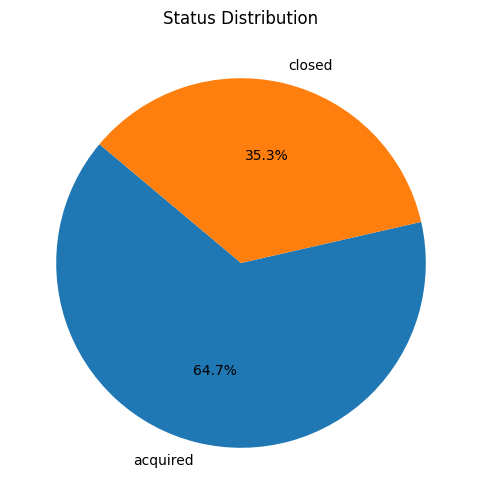

In [503]:
#check the data balance for status

status_counts = data['status'].value_counts()

# Plot a pie chart
plt.figure(figsize=(8, 6))
plt.pie(status_counts, labels=status_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Status Distribution')
plt.show()

# Data Preprocessing

In [342]:
#convert date objs to datetime 
data['founded_at'] = pd.to_datetime(data['founded_at'])
data['closed_at'] = pd.to_datetime(data['closed_at'])
data['first_funding_at'] = pd.to_datetime(data['first_funding_at'])
data['last_funding_at'] = pd.to_datetime(data['last_funding_at'])

In [343]:
#closed_at has missing values, check the nulls according to status

acquired_companies = data[data['status'] == "acquired"]['closed_at'].isnull().sum()


non_acquired_companies = data[data['status'] == "closed"]['closed_at'].isnull().sum()

print(f"acquired_companies:{acquired_companies}\n" f"non_acquired_companies:{non_acquired_companies}")

acquired_companies:588
non_acquired_companies:0


The companies having missing values in closed_at are the companies which are acquired so they are still running till date so it makes sense why they do not have a closed_at value when acquired.

In [344]:
#fill missing values in closed_at with current date as the company is still running

current_date = pd.to_datetime('today').strftime('%Y-%m-%d')

data["closed_at"] = data["closed_at"].fillna(current_date)

data

,state_code,latitude,longitude,zip_code,id,city,name,founded_at,closed_at,first_funding_at,last_funding_at,age_first_funding_year,age_last_funding_year,age_first_milestone_year,age_last_milestone_year,relationships,funding_rounds,funding_total_usd,milestones,state_code.1,is_CA,is_NY,is_MA,is_TX,is_otherstate,category_code,is_software,is_web,is_mobile,is_enterprise,is_advertising,is_gamesvideo,is_ecommerce,is_biotech,is_consulting,is_othercategory,object_id,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500,status
0,CA,42.358880,-71.056820,92101,c:6669,San Diego,Bandsintown,2007-01-01,2024-06-22,2009-04-01,2010-01-01,2.2493,3.0027,4.6685,6.7041,3,3,375000,3,CA,1,0,0,0,0,music,0,0,0,0,0,0,0,0,0,1,c:6669,0,1,0,0,0,0,1.0000,0,acquired
1,CA,37.238916,-121.973718,95032,c:16283,Los Gatos,TriCipher,2000-01-01,2024-06-22,2005-02-14,2009-12-28,5.1260,9.9973,7.0055,7.0055,9,4,40100000,1,CA,1,0,0,0,0,enterprise,0,0,0,1,0,0,0,0,0,0,c:16283,1,0,0,1,1,1,4.7500,1,acquired
2,CA,32.901049,-117.192656,92121,c:65620,San Diego,Plixi,2009-03-18,2024-06-22,2010-03-30,2010-03-30,1.0329,1.0329,1.4575,2.2055,5,1,2600000,2,CA,1,0,0,0,0,web,0,1,0,0,0,0,0,0,0,0,c:65620,0,0,1,0,0,0,4.0000,1,acquired
3,CA,37.320309,-122.050040,95014,c:42668,Cupertino,Solidcore Systems,2002-01-01,2024-06-22,2005-02-17,2007-04-25,3.1315,5.3151,6.0027,6.0027,5,3,40000000,1,CA,1,0,0,0,0,software,1,0,0,0,0,0,0,0,0,0,c:42668,0,0,0,1,1,1,3.3333,1,acquired
4,CA,37.779281,-122.419236,94105,c:65806,San Francisco,Inhale Digital,2010-08-01,2012-10-01,2010-08-01,2012-04-01,0.0000,1.6685,0.0384,0.0384,2,2,1300000,1,CA,1,0,0,0,0,games_video,0,0,0,0,0,1,0,0,0,0,c:65806,1,1,0,0,0,0,1.0000,1,closed
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
918,CA,37.740594,-122.376471,94107,c:21343,San Francisco,CoTweet,2009-01-01,2024-06-22,2009-07-09,2009-07-09,0.5178,0.5178,0.5808,4.5260,9,1,1100000,2,CA,1,0,0,0,0,advertising,0,0,0,0,1,0,0,0,0,0,c:21343,0,0,1,0,0,0,6.0000,1,acquired
919,MA,42.504817,-71.195611,1803,c:41747,Burlington,Reef Point Systems,1998-01-01,2008-06-25,2005-04-01,2007-03-23,7.2521,9.2274,6.0027,6.0027,1,3,52000000,1,MA,0,0,1,0,0,security,0,0,0,0,0,0,0,0,0,1,c:41747,1,0,0,1,0,0,2.6667,1,closed
920,CA,37.408261,-122.015920,94089,c:31549,Sunnyvale,Paracor Medical,1999-01-01,2012-06-17,2007-06-29,2007-06-29,8.4959,8.4959,9.0055,9.0055,5,1,44000000,1,CA,1,0,0,0,0,biotech,0,0,0,0,0,0,0,1,0,0,c:31549,0,0,0,0,0,1,8.0000,1,closed
921,CA,37.556732,-122.288378,94404,c:33198,San Francisco,Causata,2009-01-01,2024-06-22,2009-10-05,2011-11-01,0.7589,2.8329,0.7589,3.8356,12,2,15500000,2,CA,1,0,0,0,0,software,1,0,0,0,0,0,0,0,0,0,c:33198,0,0,1,1,0,0,1.0000,1,acquired


In [345]:
#closed_at has missing values, check the nulls according to status

acquired_companies = data[data['status'] == "acquired"]['closed_at'].isnull().sum()


non_acquired_companies = data[data['status'] == "closed"]['closed_at'].isnull().sum()

print(f"acquired_companies:{acquired_companies}\n" f"non_acquired_companies:{non_acquired_companies}")

acquired_companies:0
non_acquired_companies:0


In [346]:
# create new feature

# Calculate age_company_survived in days
age_company_survived_days = (data['closed_at'] - data['founded_at']).dt.days

# Convert age_company_survived to years
data['age_company_survived_years'] = age_company_survived_days / 365.25
data



,state_code,latitude,longitude,zip_code,id,city,name,founded_at,closed_at,first_funding_at,last_funding_at,age_first_funding_year,age_last_funding_year,age_first_milestone_year,age_last_milestone_year,relationships,funding_rounds,funding_total_usd,milestones,state_code.1,is_CA,is_NY,is_MA,is_TX,is_otherstate,category_code,is_software,is_web,is_mobile,is_enterprise,is_advertising,is_gamesvideo,is_ecommerce,is_biotech,is_consulting,is_othercategory,object_id,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500,status,age_company_survived_years
0,CA,42.358880,-71.056820,92101,c:6669,San Diego,Bandsintown,2007-01-01,2024-06-22,2009-04-01,2010-01-01,2.2493,3.0027,4.6685,6.7041,3,3,375000,3,CA,1,0,0,0,0,music,0,0,0,0,0,0,0,0,0,1,c:6669,0,1,0,0,0,0,1.0000,0,acquired,17.472964
1,CA,37.238916,-121.973718,95032,c:16283,Los Gatos,TriCipher,2000-01-01,2024-06-22,2005-02-14,2009-12-28,5.1260,9.9973,7.0055,7.0055,9,4,40100000,1,CA,1,0,0,0,0,enterprise,0,0,0,1,0,0,0,0,0,0,c:16283,1,0,0,1,1,1,4.7500,1,acquired,24.473648
2,CA,32.901049,-117.192656,92121,c:65620,San Diego,Plixi,2009-03-18,2024-06-22,2010-03-30,2010-03-30,1.0329,1.0329,1.4575,2.2055,5,1,2600000,2,CA,1,0,0,0,0,web,0,1,0,0,0,0,0,0,0,0,c:65620,0,0,1,0,0,0,4.0000,1,acquired,15.263518
3,CA,37.320309,-122.050040,95014,c:42668,Cupertino,Solidcore Systems,2002-01-01,2024-06-22,2005-02-17,2007-04-25,3.1315,5.3151,6.0027,6.0027,5,3,40000000,1,CA,1,0,0,0,0,software,1,0,0,0,0,0,0,0,0,0,c:42668,0,0,0,1,1,1,3.3333,1,acquired,22.472279
4,CA,37.779281,-122.419236,94105,c:65806,San Francisco,Inhale Digital,2010-08-01,2012-10-01,2010-08-01,2012-04-01,0.0000,1.6685,0.0384,0.0384,2,2,1300000,1,CA,1,0,0,0,0,games_video,0,0,0,0,0,1,0,0,0,0,c:65806,1,1,0,0,0,0,1.0000,1,closed,2.168378
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
918,CA,37.740594,-122.376471,94107,c:21343,San Francisco,CoTweet,2009-01-01,2024-06-22,2009-07-09,2009-07-09,0.5178,0.5178,0.5808,4.5260,9,1,1100000,2,CA,1,0,0,0,0,advertising,0,0,0,0,1,0,0,0,0,0,c:21343,0,0,1,0,0,0,6.0000,1,acquired,15.471595
919,MA,42.504817,-71.195611,1803,c:41747,Burlington,Reef Point Systems,1998-01-01,2008-06-25,2005-04-01,2007-03-23,7.2521,9.2274,6.0027,6.0027,1,3,52000000,1,MA,0,0,1,0,0,security,0,0,0,0,0,0,0,0,0,1,c:41747,1,0,0,1,0,0,2.6667,1,closed,10.480493
920,CA,37.408261,-122.015920,94089,c:31549,Sunnyvale,Paracor Medical,1999-01-01,2012-06-17,2007-06-29,2007-06-29,8.4959,8.4959,9.0055,9.0055,5,1,44000000,1,CA,1,0,0,0,0,biotech,0,0,0,0,0,0,0,1,0,0,c:31549,0,0,0,0,0,1,8.0000,1,closed,13.459274
921,CA,37.556732,-122.288378,94404,c:33198,San Francisco,Causata,2009-01-01,2024-06-22,2009-10-05,2011-11-01,0.7589,2.8329,0.7589,3.8356,12,2,15500000,2,CA,1,0,0,0,0,software,1,0,0,0,0,0,0,0,0,0,c:33198,0,0,1,1,0,0,1.0000,1,acquired,15.471595


In [347]:
data.columns

Index(['state_code', 'latitude', 'longitude', 'zip_code', 'id', 'city', 'name',
       'founded_at', 'closed_at', 'first_funding_at', 'last_funding_at',
       'age_first_funding_year', 'age_last_funding_year',
       'age_first_milestone_year', 'age_last_milestone_year', 'relationships',
       'funding_rounds', 'funding_total_usd', 'milestones', 'state_code.1',
       'is_CA', 'is_NY', 'is_MA', 'is_TX', 'is_otherstate', 'category_code',
       'is_software', 'is_web', 'is_mobile', 'is_enterprise', 'is_advertising',
       'is_gamesvideo', 'is_ecommerce', 'is_biotech', 'is_consulting',
       'is_othercategory', 'object_id', 'has_VC', 'has_angel', 'has_roundA',
       'has_roundB', 'has_roundC', 'has_roundD', 'avg_participants',
       'is_top500', 'status', 'age_company_survived_years'],
      dtype='object')

In [348]:
#drop cols which are useless or repeated cols

df = data.drop(columns = ['latitude', 'longitude', 'state_code', 'zip_code', 'id', 'city', 'name', 'founded_at', 'closed_at', 'first_funding_at', 'last_funding_at', 'state_code.1', 'is_CA', 'is_NY', 'is_MA', 'is_TX', 'is_otherstate', 'category_code', 'is_software', 'is_web', 'is_mobile', 'is_enterprise', 'is_advertising', 'is_gamesvideo', 'is_ecommerce', 'is_biotech', 'is_consulting', 'is_othercategory', 'object_id'])
df


,age_first_funding_year,age_last_funding_year,age_first_milestone_year,age_last_milestone_year,relationships,funding_rounds,funding_total_usd,milestones,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500,status,age_company_survived_years
0,2.2493,3.0027,4.6685,6.7041,3,3,375000,3,0,1,0,0,0,0,1.0000,0,acquired,17.472964
1,5.1260,9.9973,7.0055,7.0055,9,4,40100000,1,1,0,0,1,1,1,4.7500,1,acquired,24.473648
2,1.0329,1.0329,1.4575,2.2055,5,1,2600000,2,0,0,1,0,0,0,4.0000,1,acquired,15.263518
3,3.1315,5.3151,6.0027,6.0027,5,3,40000000,1,0,0,0,1,1,1,3.3333,1,acquired,22.472279
4,0.0000,1.6685,0.0384,0.0384,2,2,1300000,1,1,1,0,0,0,0,1.0000,1,closed,2.168378
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
918,0.5178,0.5178,0.5808,4.5260,9,1,1100000,2,0,0,1,0,0,0,6.0000,1,acquired,15.471595
919,7.2521,9.2274,6.0027,6.0027,1,3,52000000,1,1,0,0,1,0,0,2.6667,1,closed,10.480493
920,8.4959,8.4959,9.0055,9.0055,5,1,44000000,1,0,0,0,0,0,1,8.0000,1,closed,13.459274
921,0.7589,2.8329,0.7589,3.8356,12,2,15500000,2,0,0,1,1,0,0,1.0000,1,acquired,15.471595


In [349]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 923 entries, 0 to 922
Data columns (total 18 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   age_first_funding_year      923 non-null    float64
 1   age_last_funding_year       923 non-null    float64
 2   age_first_milestone_year    771 non-null    float64
 3   age_last_milestone_year     771 non-null    float64
 4   relationships               923 non-null    int64  
 5   funding_rounds              923 non-null    int64  
 6   funding_total_usd           923 non-null    int64  
 7   milestones                  923 non-null    int64  
 8   has_VC                      923 non-null    int64  
 9   has_angel                   923 non-null    int64  
 10  has_roundA                  923 non-null    int64  
 11  has_roundB                  923 non-null    int64  
 12  has_roundC                  923 non-null    int64  
 13  has_roundD                  923 non

In [350]:
df[df.isnull().any(axis = 1)]

,age_first_funding_year,age_last_funding_year,age_first_milestone_year,age_last_milestone_year,relationships,funding_rounds,funding_total_usd,milestones,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500,status,age_company_survived_years
12,4.9041,4.9041,NaN,NaN,0,1,350000,0,1,0,0,0,0,0,1.0000,0,closed,8.320329
15,6.6082,6.6082,NaN,NaN,0,1,200000,0,1,0,0,0,0,0,1.0000,0,closed,11.236140
24,0.2521,0.3370,NaN,NaN,5,2,455000,0,0,1,1,0,0,0,4.5000,1,closed,2.757016
32,-0.1671,2.0192,NaN,NaN,9,2,5000000,0,0,0,1,1,0,0,2.5000,1,closed,5.379877
34,0.0822,0.0822,NaN,NaN,2,1,25000,0,0,1,0,0,0,0,1.0000,0,closed,2.986995
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
885,3.6548,3.6548,NaN,NaN,0,1,1900000,0,0,0,1,0,0,0,1.0000,1,closed,5.171800
903,3.7562,3.7562,NaN,NaN,1,1,27500000,0,0,0,0,0,1,0,7.0000,1,acquired,22.472279
904,4.2795,4.2795,NaN,NaN,4,1,9000000,0,0,0,0,0,0,1,2.0000,1,closed,6.291581
906,5.3041,8.6247,NaN,NaN,4,3,53000000,0,0,0,0,0,1,1,4.6667,1,acquired,24.473648


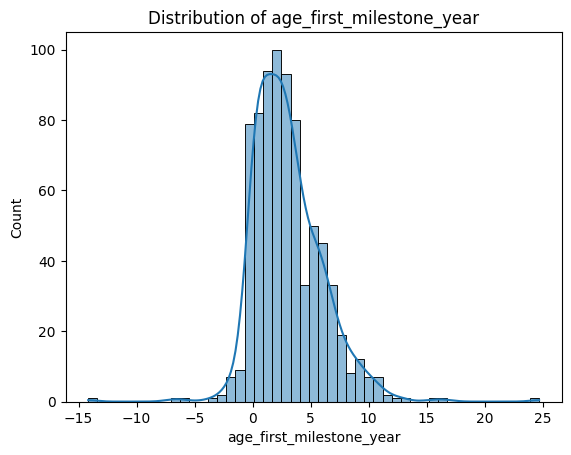

In [351]:
# visualize distribution of missing values

sns.histplot(df['age_first_milestone_year'].dropna(), kde=True)
plt.title('Distribution of age_first_milestone_year')
plt.show()

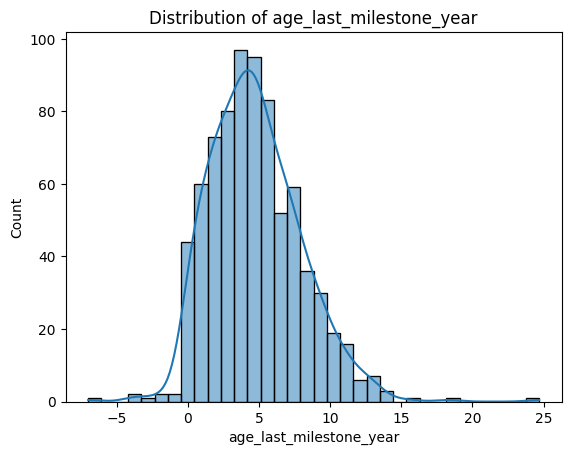

In [352]:
# visualize distribution of missing values

sns.histplot(df['age_last_milestone_year'].dropna(), kde=True)
plt.title('Distribution of age_last_milestone_year')
plt.show()

In [353]:
# Check correlation with other features
correlation = df.corr(numeric_only = True)['funding_total_usd'].sort_values(ascending=False)
print(correlation)

funding_total_usd             1.000000
age_last_funding_year         0.116371
funding_rounds                0.115800
relationships                 0.093790
age_last_milestone_year       0.093529
age_first_milestone_year      0.063900
age_company_survived_years    0.062125
is_top500                     0.048978
age_first_funding_year        0.046350
avg_participants              0.046250
has_roundC                    0.045405
has_roundD                    0.045146
has_roundB                    0.020119
milestones                    0.012056
has_VC                        0.010060
has_roundA                   -0.023721
has_angel                    -0.059650
Name: funding_total_usd, dtype: float64


In [354]:
df.tail(10)

,age_first_funding_year,age_last_funding_year,age_first_milestone_year,age_last_milestone_year,relationships,funding_rounds,funding_total_usd,milestones,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500,status,age_company_survived_years
913,1.2904,1.2904,7.1233,7.1233,3,1,2000000,1,0,0,1,0,0,0,1.0000,0,closed,4.095825
914,3.2137,3.2137,3.0027,4.6219,5,1,2700000,2,0,0,1,0,0,0,2.0000,1,acquired,17.472964
915,5.1315,5.1315,3.1616,8.5123,6,1,2000000,2,0,0,1,0,0,0,2.0000,0,closed,7.997262
916,0.0000,3.9288,2.9151,5.7342,16,3,18000000,3,1,0,1,1,0,0,2.3333,1,acquired,17.793292
917,5.6301,8.7589,8.5041,8.7589,9,5,122500000,2,1,0,0,0,1,1,5.6000,1,acquired,24.473648
918,0.5178,0.5178,0.5808,4.5260,9,1,1100000,2,0,0,1,0,0,0,6.0000,1,acquired,15.471595
919,7.2521,9.2274,6.0027,6.0027,1,3,52000000,1,1,0,0,1,0,0,2.6667,1,closed,10.480493
920,8.4959,8.4959,9.0055,9.0055,5,1,44000000,1,0,0,0,0,0,1,8.0000,1,closed,13.459274
921,0.7589,2.8329,0.7589,3.8356,12,2,15500000,2,0,0,1,1,0,0,1.0000,1,acquired,15.471595
922,3.1205,3.1205,4.0027,4.0027,4,1,20000000,1,0,0,0,1,0,0,3.0000,1,acquired,21.472964


In [355]:
# impute age_first_milestone_year & age_last_milestone_year using mean

df["age_first_milestone_year"] = df["age_first_milestone_year"].fillna(df["age_first_milestone_year"].mean())
df["age_last_milestone_year"] = df["age_last_milestone_year"].fillna(df["age_last_milestone_year"].mean())
df

,age_first_funding_year,age_last_funding_year,age_first_milestone_year,age_last_milestone_year,relationships,funding_rounds,funding_total_usd,milestones,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500,status,age_company_survived_years
0,2.2493,3.0027,4.6685,6.7041,3,3,375000,3,0,1,0,0,0,0,1.0000,0,acquired,17.472964
1,5.1260,9.9973,7.0055,7.0055,9,4,40100000,1,1,0,0,1,1,1,4.7500,1,acquired,24.473648
2,1.0329,1.0329,1.4575,2.2055,5,1,2600000,2,0,0,1,0,0,0,4.0000,1,acquired,15.263518
3,3.1315,5.3151,6.0027,6.0027,5,3,40000000,1,0,0,0,1,1,1,3.3333,1,acquired,22.472279
4,0.0000,1.6685,0.0384,0.0384,2,2,1300000,1,1,1,0,0,0,0,1.0000,1,closed,2.168378
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
918,0.5178,0.5178,0.5808,4.5260,9,1,1100000,2,0,0,1,0,0,0,6.0000,1,acquired,15.471595
919,7.2521,9.2274,6.0027,6.0027,1,3,52000000,1,1,0,0,1,0,0,2.6667,1,closed,10.480493
920,8.4959,8.4959,9.0055,9.0055,5,1,44000000,1,0,0,0,0,0,1,8.0000,1,closed,13.459274
921,0.7589,2.8329,0.7589,3.8356,12,2,15500000,2,0,0,1,1,0,0,1.0000,1,acquired,15.471595


In [356]:
df.isna().sum()

age_first_funding_year        0
age_last_funding_year         0
age_first_milestone_year      0
age_last_milestone_year       0
relationships                 0
funding_rounds                0
funding_total_usd             0
milestones                    0
has_VC                        0
has_angel                     0
has_roundA                    0
has_roundB                    0
has_roundC                    0
has_roundD                    0
avg_participants              0
is_top500                     0
status                        0
age_company_survived_years    0
dtype: int64

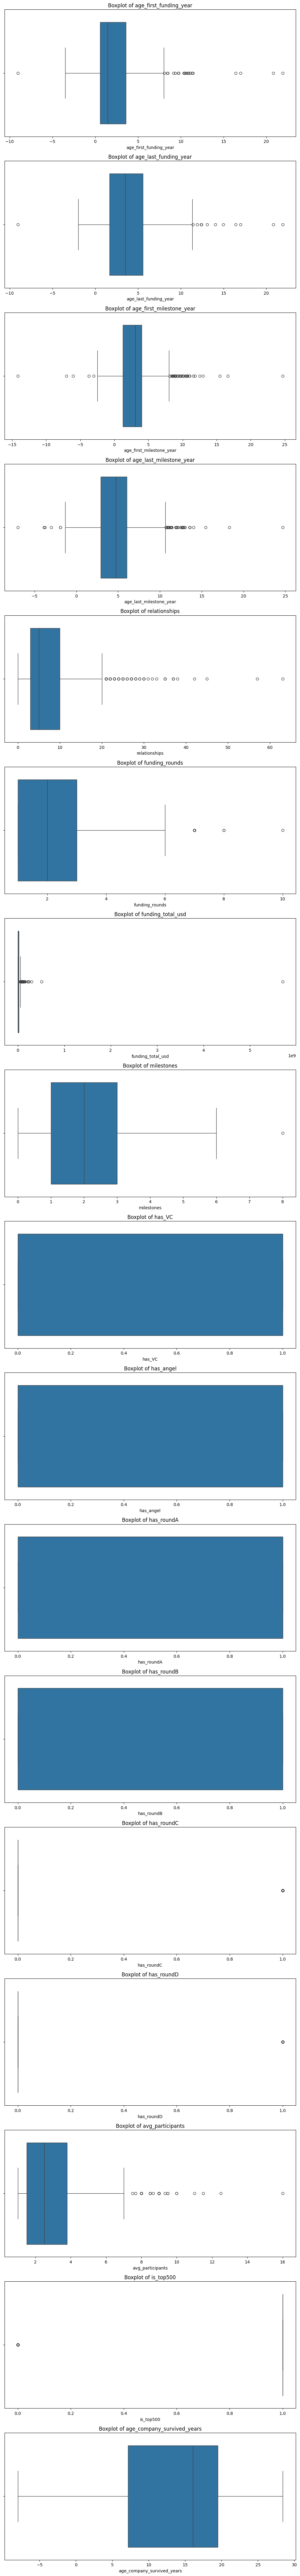

In [357]:
#check for outliers using boxplot

numeric_columns = df.select_dtypes(include=['number']).columns

# Set up the matplotlib figure
num_plots = len(numeric_columns)
fig, axes = plt.subplots(num_plots, 1, figsize=(10, num_plots * 5))

# Ensure axes is iterable in case there's only one numeric column
if num_plots == 1:
    axes = [axes]

# Create a boxplot for each numeric column
for ax, col in zip(axes, numeric_columns):
    sns.boxplot(x=df[col], ax=ax)
    ax.set_title(f'Boxplot of {col}')

plt.tight_layout()
plt.show()

we can see age_first_funding_year, age_last_funding_year,age_first_milestone_year, age_last_milestone_year, relationships, funding_rounds, funding_total_usd, all these have outliers 


In [358]:
#check if outlier cols have -ve values

print(f"first funding yr: {(df['age_first_funding_year'] < 0).any()} \n" f"age last funding yr: {(df['age_last_funding_year'] < 0).any()}\n"
     f"first milestone yr: {(df['age_first_milestone_year'] < 0).any()} \n" f"last milestone yr: {(df['age_last_milestone_year'] < 0).any()} \n"
     f"relationships: {(df['relationships'] < 0).any()}\n", f"funding rounds: {(df['funding_rounds'] < 0).any()} \n"
     f"funding total usd: {(df['funding_total_usd'] < 0).any()} \n")


first funding yr: True 
age last funding yr: True
first milestone yr: True 
last milestone yr: True 
relationships: False
 funding rounds: False 
funding total usd: False 



age_first_funding_year and age_last_funding_year have -ve values as they are calculated by subtracting first funding and last funding from founded year. it can be that a company was funded even before it was founded and it can be that sometimes the company received only 1 funding and hence it is the first and last funding

A company cannot logically achieve its first milestone or last milestone before being founded, so there is some anomaly or error in the data.
Also we dont have the original year col for first_milestone year by whih we can subtract from founding year to check if age_first_milestone_year is correctly calculated.
So we can remove or impute rows having -ve values for age_first_milestone_year and age_last_milestone_year

In [359]:
(df["age_first_milestone_year"] < 0).value_counts()

age_first_milestone_year
False    877
True      46
Name: count, dtype: int64

In [360]:
(df["age_last_milestone_year"] < 0).value_counts()

age_last_milestone_year
False    911
True      12
Name: count, dtype: int64

In [361]:
(df["age_first_milestone_year"] == -2).value_counts()

age_first_milestone_year
False    923
Name: count, dtype: int64

In [362]:
(df["age_last_milestone_year"] == -2).value_counts()

age_last_milestone_year
False    923
Name: count, dtype: int64

there is no value in age_first_milestone_year and age_last_milestone_year with -2 so we can safely impute all -ve values in these cols with -2 indicating that these maybe incorrect values and need to be corrected

we dont want to remove rows having -ve values in age_first_milestone_year and age_last_milestone_year as there are very few of such and also the reamining cols have imp info which we do not want to lose

In [363]:
df.loc[df["age_first_milestone_year"] < 0, "age_first_milestone_year"] = -2
df.loc[df["age_last_milestone_year"] < 0, "age_last_milestone_year"] = -2

In [364]:
(df["age_first_milestone_year"] == -2).value_counts()

age_first_milestone_year
False    877
True      46
Name: count, dtype: int64

In [365]:
(df["age_last_milestone_year"] == -2).value_counts()

age_last_milestone_year
False    911
True      12
Name: count, dtype: int64

In [366]:
df

,age_first_funding_year,age_last_funding_year,age_first_milestone_year,age_last_milestone_year,relationships,funding_rounds,funding_total_usd,milestones,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500,status,age_company_survived_years
0,2.2493,3.0027,4.6685,6.7041,3,3,375000,3,0,1,0,0,0,0,1.0000,0,acquired,17.472964
1,5.1260,9.9973,7.0055,7.0055,9,4,40100000,1,1,0,0,1,1,1,4.7500,1,acquired,24.473648
2,1.0329,1.0329,1.4575,2.2055,5,1,2600000,2,0,0,1,0,0,0,4.0000,1,acquired,15.263518
3,3.1315,5.3151,6.0027,6.0027,5,3,40000000,1,0,0,0,1,1,1,3.3333,1,acquired,22.472279
4,0.0000,1.6685,0.0384,0.0384,2,2,1300000,1,1,1,0,0,0,0,1.0000,1,closed,2.168378
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
918,0.5178,0.5178,0.5808,4.5260,9,1,1100000,2,0,0,1,0,0,0,6.0000,1,acquired,15.471595
919,7.2521,9.2274,6.0027,6.0027,1,3,52000000,1,1,0,0,1,0,0,2.6667,1,closed,10.480493
920,8.4959,8.4959,9.0055,9.0055,5,1,44000000,1,0,0,0,0,0,1,8.0000,1,closed,13.459274
921,0.7589,2.8329,0.7589,3.8356,12,2,15500000,2,0,0,1,1,0,0,1.0000,1,acquired,15.471595


In [367]:
# encode categorical values
label_encoder = LabelEncoder()

# Fit and transform the status column
df['status'] = label_encoder.fit_transform(df['status'])
df

,age_first_funding_year,age_last_funding_year,age_first_milestone_year,age_last_milestone_year,relationships,funding_rounds,funding_total_usd,milestones,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500,status,age_company_survived_years
0,2.2493,3.0027,4.6685,6.7041,3,3,375000,3,0,1,0,0,0,0,1.0000,0,0,17.472964
1,5.1260,9.9973,7.0055,7.0055,9,4,40100000,1,1,0,0,1,1,1,4.7500,1,0,24.473648
2,1.0329,1.0329,1.4575,2.2055,5,1,2600000,2,0,0,1,0,0,0,4.0000,1,0,15.263518
3,3.1315,5.3151,6.0027,6.0027,5,3,40000000,1,0,0,0,1,1,1,3.3333,1,0,22.472279
4,0.0000,1.6685,0.0384,0.0384,2,2,1300000,1,1,1,0,0,0,0,1.0000,1,1,2.168378
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
918,0.5178,0.5178,0.5808,4.5260,9,1,1100000,2,0,0,1,0,0,0,6.0000,1,0,15.471595
919,7.2521,9.2274,6.0027,6.0027,1,3,52000000,1,1,0,0,1,0,0,2.6667,1,1,10.480493
920,8.4959,8.4959,9.0055,9.0055,5,1,44000000,1,0,0,0,0,0,1,8.0000,1,1,13.459274
921,0.7589,2.8329,0.7589,3.8356,12,2,15500000,2,0,0,1,1,0,0,1.0000,1,0,15.471595


# Model Building

In [370]:
# Define features and target
X = df.drop(columns=['status'])
y = df['status']

In [371]:
# # Define the ColumnTransformer
# trf = ColumnTransformer([
#     ('scale', StandardScaler(), slice(0, X.shape[1]))  # Scale all feature columns
# ])

In [372]:
# Define the pipeline
pipeline = Pipeline([
    ('classifier', xgb.XGBClassifier(use_label_encoder=False, eval_metric='mlogloss'))
])

In [373]:
# Split the data into train and test sets (80% train, 20% test)
X_train_full, X_test, y_train_full, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Further split the training data into train and validation sets (75% train, 25% validation of the original training set)
X_train, X_val, y_train, y_val = train_test_split(X_train_full, y_train_full, test_size=0.25, random_state=42)

In [374]:
# Fit the pipeline to the training data
pipeline.fit(X_train, y_train)

/Users/sarah/ml/my_env/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [08:46:57] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Pipeline(steps=[('classifier',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_bynode=None,
                               colsample_bytree=None, device=None,
                               early_stopping_rounds=None,
                               enable_categorical=False, eval_metric='mlogloss',
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=None, n_jobs=None,
                               num_parallel_tree=None, random_state=None, ...))])

In [375]:
# Predict on the validation data
y_val_pred = pipeline.predict(X_val)

In [376]:
# Evaluate the model's accuracy on the validation set
val_accuracy = accuracy_score(y_val, y_val_pred)
print(f"Validation Accuracy: {val_accuracy:.4f}")

# Evaluate the model's precision for each class on the validation set
val_precision = precision_score(y_val, y_val_pred, average=None)
print(f"Validation Precision for each class: {val_precision}")

Validation Accuracy: 0.9946
Validation Precision for each class: [1.         0.98630137]


In [377]:
# Print the classification report for the validation set
target_names = label_encoder.inverse_transform([0, 1])

print("Validation Classification Report:")
print(classification_report(y_val, y_val_pred, target_names=target_names))

Validation Classification Report:
              precision    recall  f1-score   support

    acquired       1.00      0.99      1.00       113
      closed       0.99      1.00      0.99        72

    accuracy                           0.99       185
   macro avg       0.99      1.00      0.99       185
weighted avg       0.99      0.99      0.99       185



In [378]:
# Predict on the test data
y_test_pred = pipeline.predict(X_test)

In [379]:
# Evaluate the model's accuracy on the test set
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f"Test Accuracy: {test_accuracy:.4f}")

# Evaluate the model's precision for each class on the test set
test_precision = precision_score(y_test, y_test_pred, average=None)
print(f"Test Precision for each class: {test_precision}")

# Print the classification report for the test set
print("Test Classification Report:")
print(classification_report(y_test, y_test_pred, target_names=target_names))

Test Accuracy: 0.9838
Test Precision for each class: [0.99099099 0.97297297]
Test Classification Report:
              precision    recall  f1-score   support

    acquired       0.99      0.98      0.99       112
      closed       0.97      0.99      0.98        73

    accuracy                           0.98       185
   macro avg       0.98      0.98      0.98       185
weighted avg       0.98      0.98      0.98       185



In [380]:
def plot_confusion_matrix_and_metrics(y_true, y_pred):
    
    categories = ['0 : Acquired', '1 : Closed']

    # Generate confusion matrix
    conf = confusion_matrix(y_true, y_pred)
    
    # Plot confusion matrix using seaborn heatmap
    sns.heatmap(conf, annot=True, fmt='', cmap='Blues',
                xticklabels=categories, yticklabels=categories)
    
    # Calculate performance metrics
    f1 = f1_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    
    # Add metrics information to the plot
    plt.xlabel(f"Predicted Label\n\nF1 score: {f1:.3f}\nRecall: {recall:.4f}\nPrecision: {precision:.4f}")
    plt.ylabel('Actual Label')
    plt.title('Confusion Matrix')
    plt.savefig('plot_name.png')  # Save the plot as an image
    plt.show()

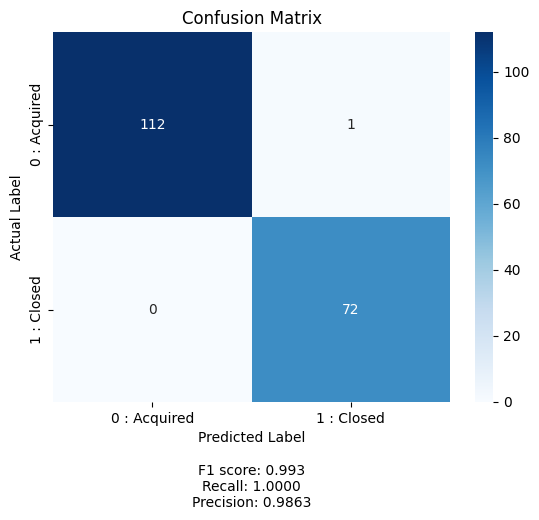

In [381]:
plot_confusion_matrix_and_metrics(y_val, y_val_pred)

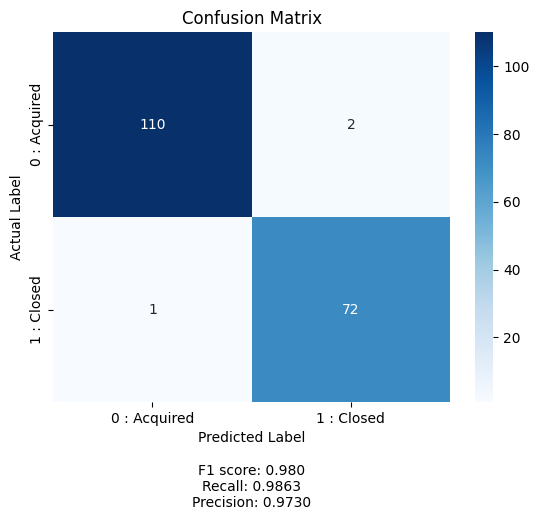

In [382]:
plot_confusion_matrix_and_metrics(y_test, y_test_pred)

# Prediction

In [387]:
a_xg = np.array(y_test)
predicted_xg = np.array(pipeline.predict(X_test))
df_xg = pd.DataFrame({'Original':a_xg,'Predicted':predicted_xg})
df_xg

,Original,Predicted
0,0,0
1,0,0
2,1,1
3,1,1
4,1,1
...,...,...
180,0,0
181,1,1
182,0,0
183,0,0


In [ ]:
# Plotting
plt.figure(figsize=(8, 5))
plt.plot(thresholds, precision_threshold, marker='o', linestyle='-', color='b', label='Precision')
plt.plot(thresholds, f1_score_threshold, marker='o', linestyle='-', color='g', label='F1 Score')

plt.xlabel('Thresholds')
plt.ylabel('Score')
plt.title('Precision and F1 Score vs. Thresholds')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()